# Overfit/Underfit em KNN e Decision Trees

O objetivo deste exercício é alterar os parâmetros visando underfitar e overfitar KNNs e Decision Trees. Compare visualmente as fronteiras de decisão dos classificadores.

Links úteis:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


####################################
####################################
Dataset moons
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40,)
------------------------------------
     Classifier 25-NN
         Accuracy Train/Test 0.8 0.9
------------------------------------
     Classifier 7-NN
         Accuracy Train/Test 0.95 0.95
------------------------------------
     Classifier 1-NN
         Accuracy Train/Test 1.0 0.975
------------------------------------
     Classifier Decision Tree D = 1
         Accuracy Train/Test 0.8166666666666667 0.75
------------------------------------
     Classifier Decision Tree D = 5
         Accuracy Train/Test 0.9833333333333333 0.95
------------------------------------
     Classifier Decision Tree D = 750


/home/hugo/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


         Accuracy Train/Test 1.0 0.9

####################################
####################################
Dataset circles
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40,)
------------------------------------
     Classifier 25-NN
         Accuracy Train/Test 0.6666666666666666 0.825
------------------------------------
     Classifier 7-NN
         Accuracy Train/Test 0.8833333333333333 0.9
------------------------------------
     Classifier 1-NN
         Accuracy Train/Test 1.0 0.875
------------------------------------
     Classifier Decision Tree D = 1
         Accuracy Train/Test 0.65 0.65
------------------------------------
     Classifier Decision Tree D = 5
         Accuracy Train/Test 0.9833333333333333 0.775
------------------------------------
     Classifier Decision Tree D = 750
         Accuracy Train/Test 1.0 0.8

####################################
####################################
Dataset iris
X_train (60, 2)
X_test (40, 2)
y_train (60,)
y_test (40

/home/hugo/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


------------------------------------
     Classifier 7-NN
         Accuracy Train/Test 0.9833333333333333 1.0
------------------------------------
     Classifier 1-NN
         Accuracy Train/Test 1.0 1.0
------------------------------------
     Classifier Decision Tree D = 1
         Accuracy Train/Test 0.8833333333333333 0.9
------------------------------------
     Classifier Decision Tree D = 5
         Accuracy Train/Test 1.0 1.0
------------------------------------
     Classifier Decision Tree D = 750
         Accuracy Train/Test 1.0 0.975


/home/hugo/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


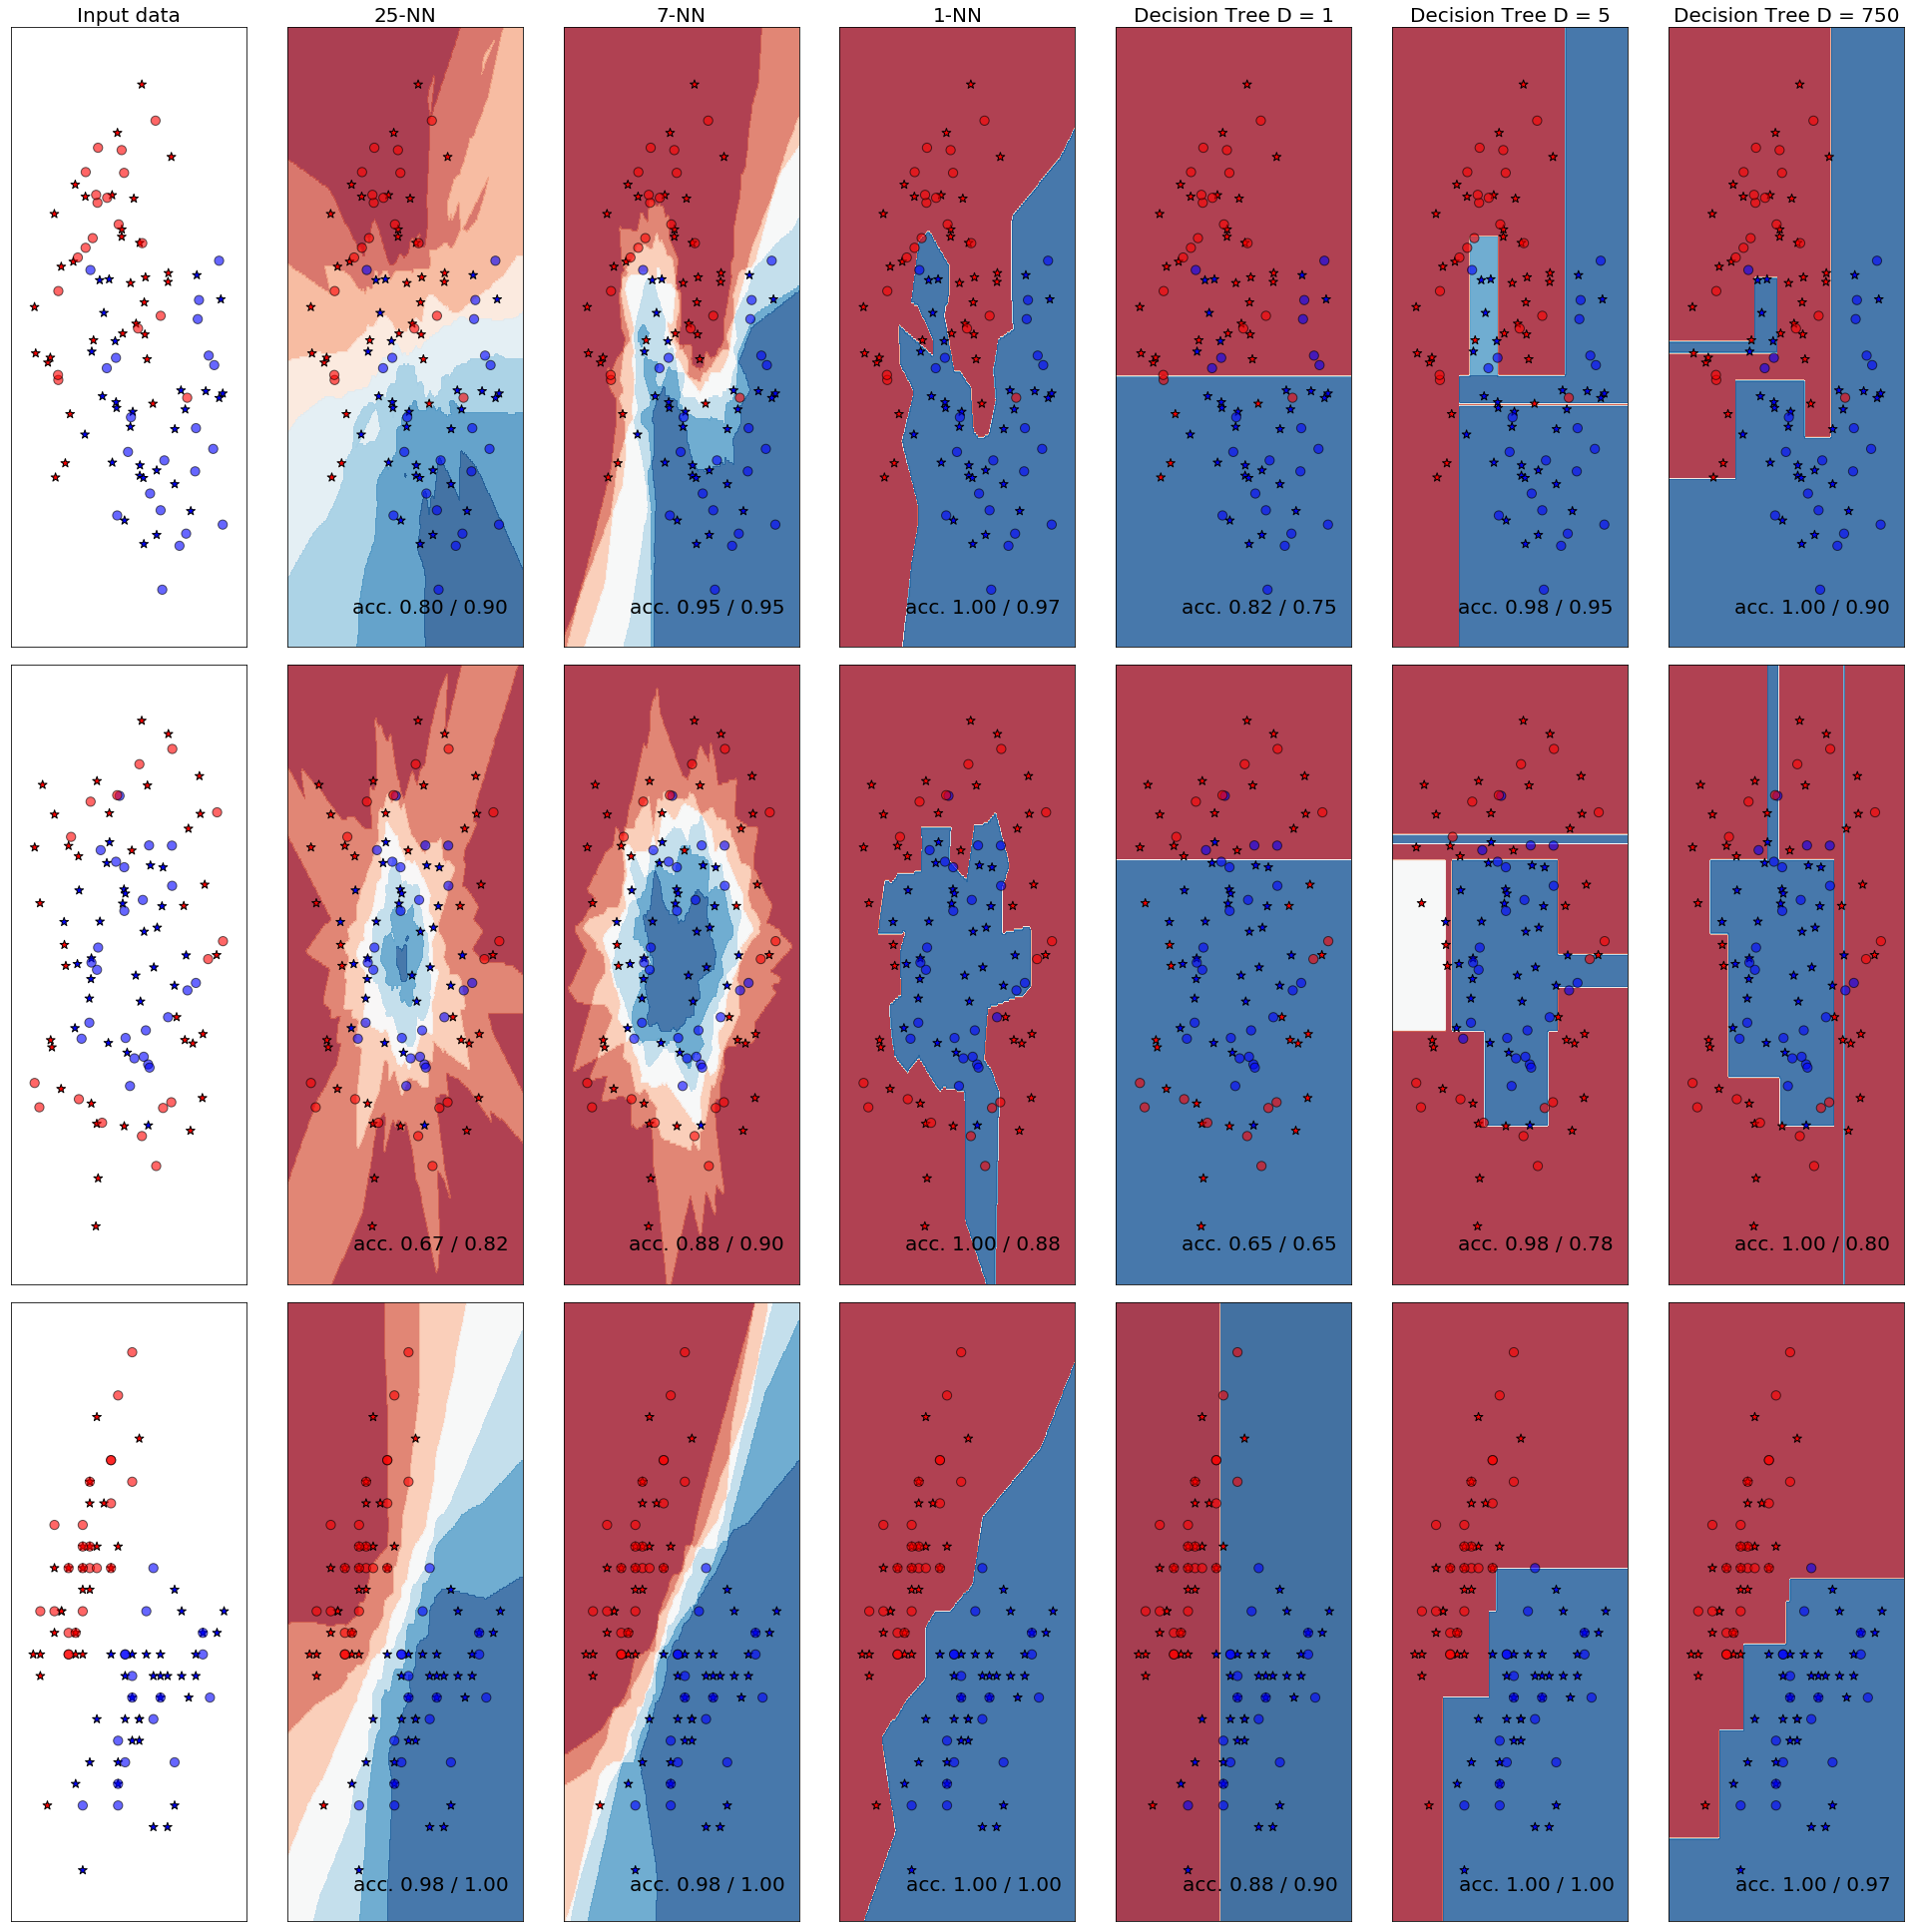

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline

#############################################################################################################
# Adapted from: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html #
#############################################################################################################

h = .02  # Step size in the mesh for plotting.

# Classifier names.
names = ['25-NN', '7-NN', '1-NN', 'Decision Tree D = 1', 'Decision Tree D = 5', 'Decision Tree D = 750']

# Presetting classifiers.
classifiers = [
    KNeighborsClassifier(25),
    KNeighborsClassifier(7),
    KNeighborsClassifier(1),
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=1500, min_impurity_split=0, min_impurity_decrease=0, max_features=1),
]

# Presetting datasets.
iris_indices = np.where(load_iris()['target'] < 2)[0]
dataset_names = ['moons', 'circles', 'iris']
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            (load_iris()['data'][iris_indices, 0:2], load_iris()['target'][iris_indices])
            ]

# Presetting matplotlib figure.
figure = plt.figure(figsize=(27, 27))
marker_size = 85
text_size = 20
i = 1

# Iterate over datasets.
for ds_cnt, ds in enumerate(datasets):
    
    ds_name = dataset_names[ds_cnt]
    
    # Split into training and test part.
    X, y = ds # X -> features, y -> labels.
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Splitting.

    # Printing dataset shapes.
    print('')
    print('####################################')
    print('####################################')
    print('Dataset', ds_name)
    print('X_train', X_train.shape)
    print('X_test', X_test.shape)
    print('y_train', y_train.shape)
    print('y_test', y_test.shape)
    
    # Finding boundaries.
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first.
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size=text_size)
    
    # Plot the training points;
    ax.scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
    # and testing points.
    ax.scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k', marker='o')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers.
    for name, clf in zip(names, classifiers):
        
        print('------------------------------------')
        print('    ', 'Classifier', name)
        
        # Adding subplot.
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # Fitting classifier to train data.
        clf.fit(X_train, y_train)
        
        # Obtaining class prediction for training data.
        y_pred_train = clf.predict(X_train)
        
        # Obtaining class prediction for unseen data.
        y_pred_test = clf.predict(X_test)
        
        # Computing error metrics in the training data.
        acc_train = metrics.accuracy_score(y_train, y_pred_train)
        
        # Computing error metrics in the unseen data.
        acc_test = metrics.accuracy_score(y_test, y_pred_test)
        
        # Printing error metrics.
        print('        ', 'Accuracy Train/Test', acc_train, acc_test)

        # Plot the decision boundary.
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot.
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points;
        ax.scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
        # and testing points.
        ax.scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, edgecolors='k', marker='o', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size=text_size)
        
        # Printing error metrics.
        ax.text(xx.max() - .3, yy.min() + .3,  ('acc. %.2f / %.2f' % (acc_train, acc_test)).lstrip('0'), size=text_size, horizontalalignment='right')
        
        i += 1

plt.tight_layout()
plt.show()